# Load Packages


In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  
print('GPUs Available:', tf.config.list_physical_devices('GPU'))


GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Import the dataset

In [287]:
df = pd.read_csv ("glass.csv")
df2 = df.set_index('Type')
df2 = df2.dropna()
df2.head()
print (df2.head(10))

           RI     Na    Mg    Al     Si     K    Ca   Ba    Fe
Type                                                          
1     1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00
1     1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00
1     1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00
1     1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00
1     1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00
1     1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26
1     1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00
1     1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00
1     1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00
1     1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11


# Checking Data Types

In [288]:
print (df.dtypes)

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


# checking rows for duplicate data

In [289]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicated rows: ", duplicate_rows_df.shape)

number of duplicated rows:  (1, 10)


# count the number of null values in each column

In [290]:
print(df.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


# print summary statictics

In [291]:
print(df2.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe  
count  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009  
std      1.423153    0.497219    0.097439  
min      5.430000    0.000000    0.000000  
25%      8.240000    0.000000    0.000000  
50%   

# Create a pairplot of the data

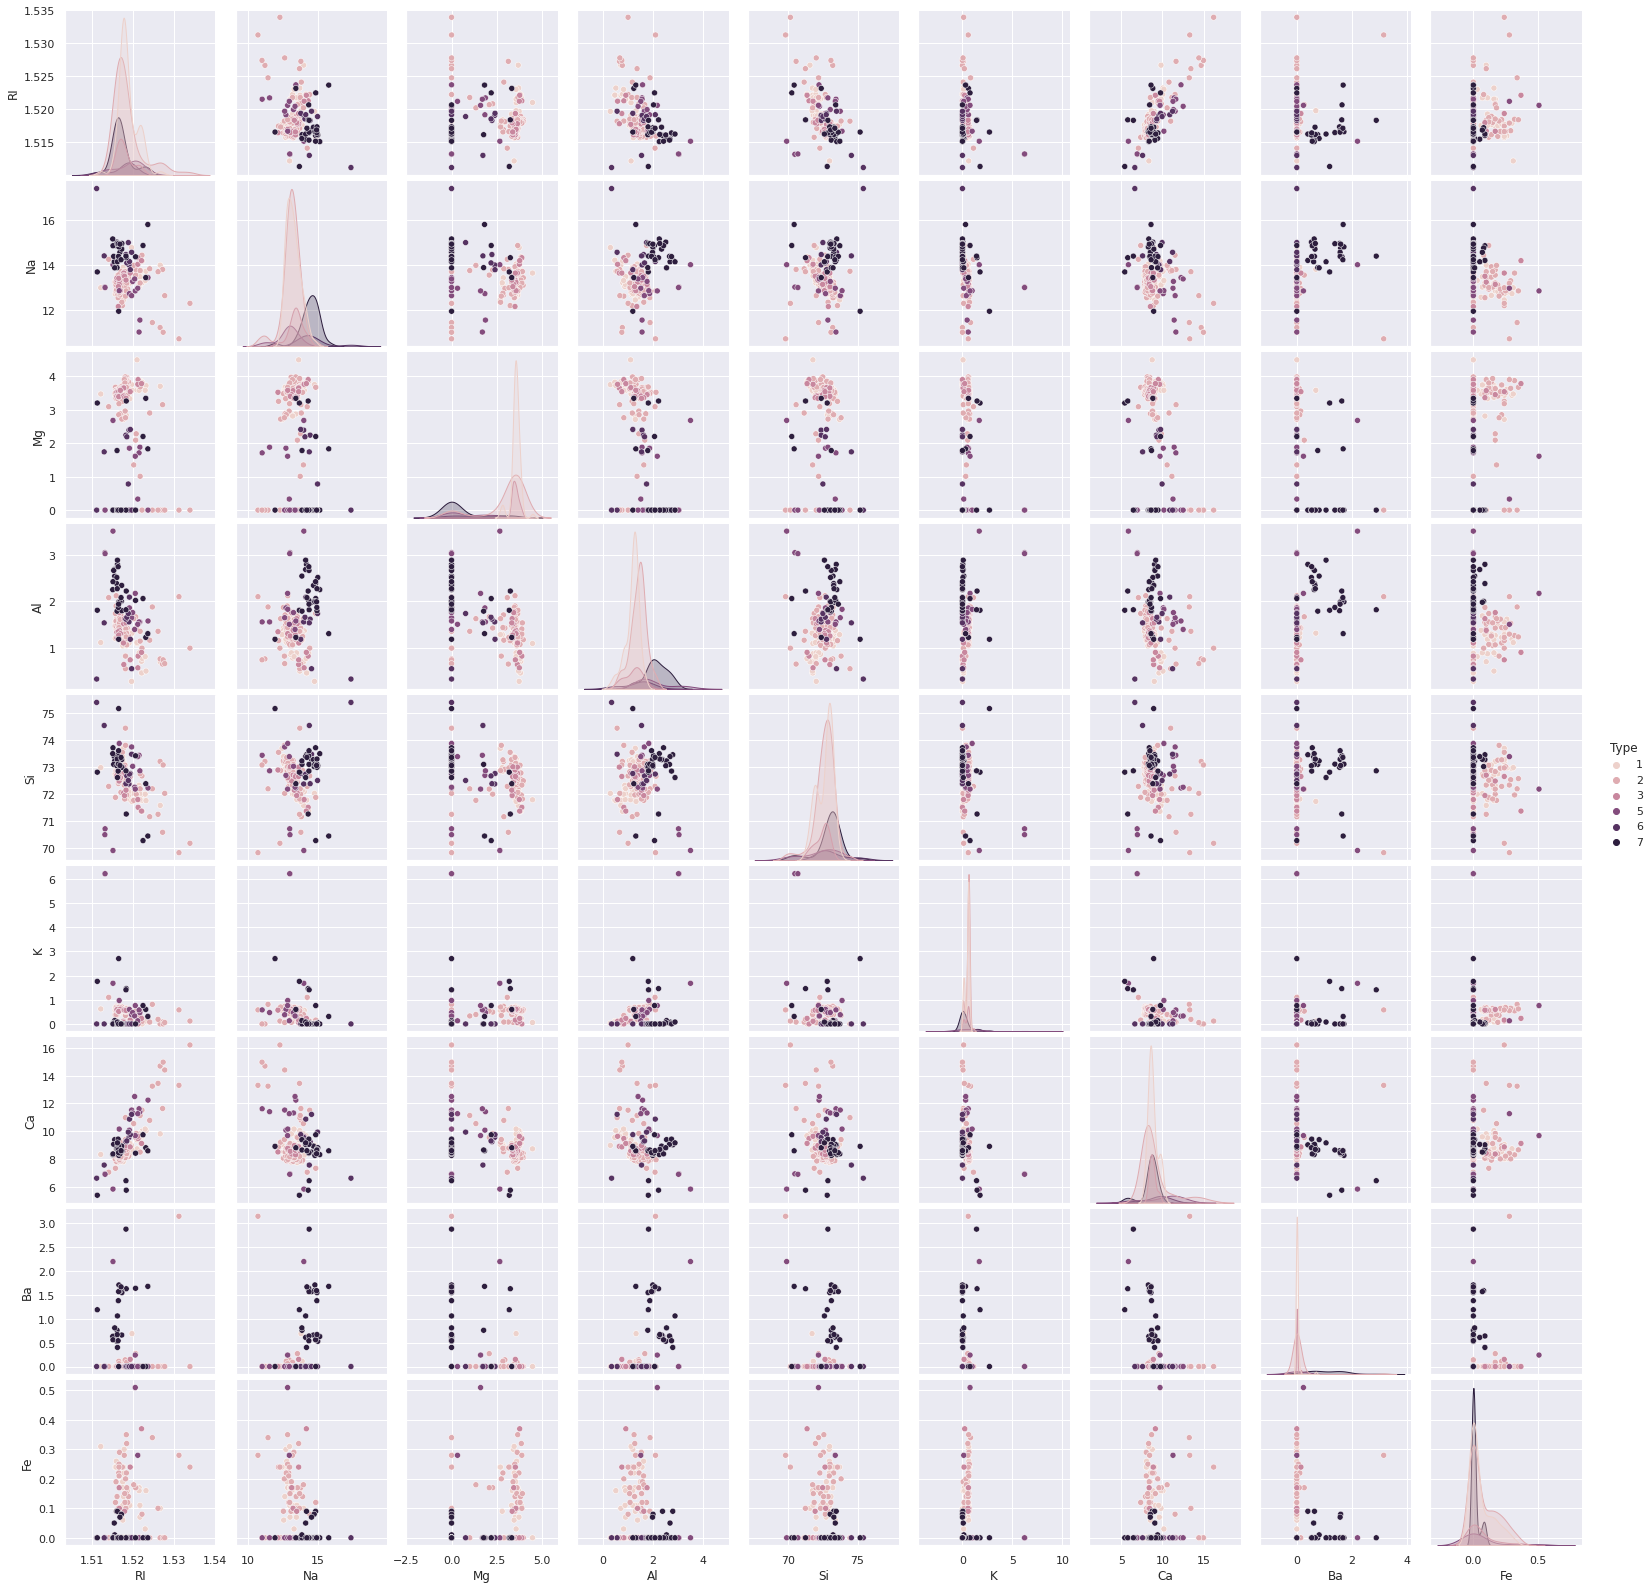

In [292]:
p=sns.pairplot(df, hue='Type')

# Display Refractive Index

/home/antony/anaconda3/envs/bd/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


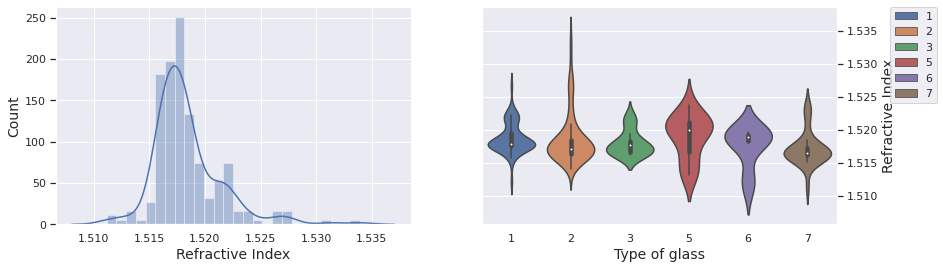

In [293]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['RI'], ax = axes[0])
axes[0].set_xlabel('Refractive Index', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'RI', data = df, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Refractive Index', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

# Sodium

/home/antony/anaconda3/envs/bd/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


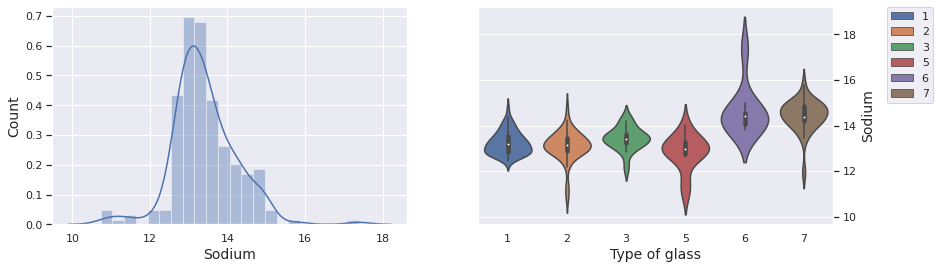

In [294]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['Na'], ax = axes[0])
axes[0].set_xlabel('Sodium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Na', data = df, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Sodium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

# Magnesium

/home/antony/anaconda3/envs/bd/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


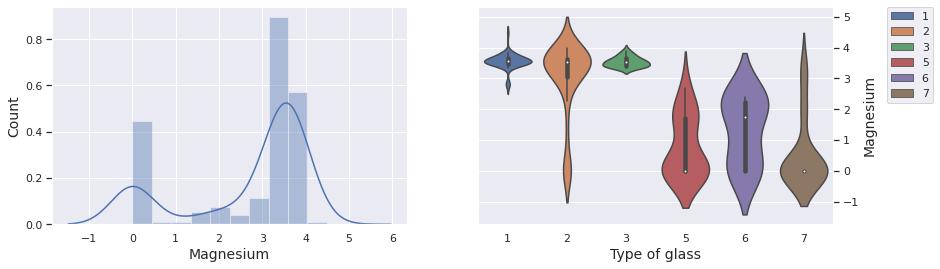

In [295]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['Mg'], ax = axes[0])
axes[0].set_xlabel('Magnesium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Mg', data = df, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Magnesium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

# Aluminium

/home/antony/anaconda3/envs/bd/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


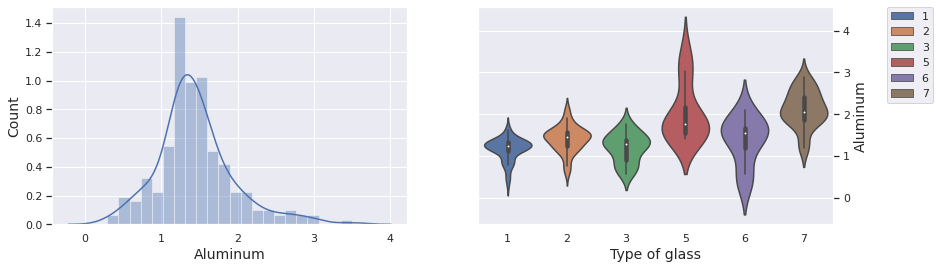

In [296]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['Al'], ax = axes[0])
axes[0].set_xlabel('Aluminum', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Al', data = df, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Aluminum', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

# Silicon

/home/antony/anaconda3/envs/bd/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


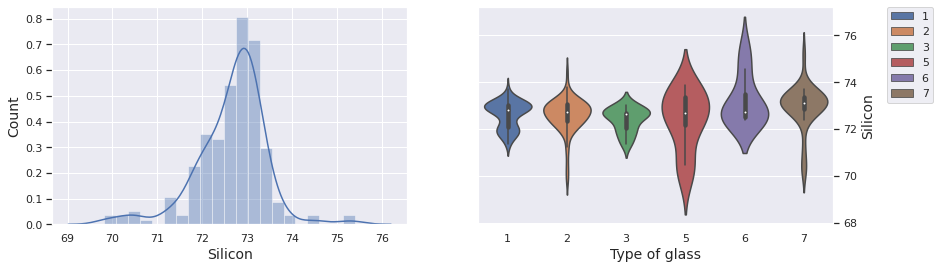

In [297]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['Si'], ax = axes[0])
axes[0].set_xlabel('Silicon', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Si', data = df, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Silicon', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

# Potassium

/home/antony/anaconda3/envs/bd/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


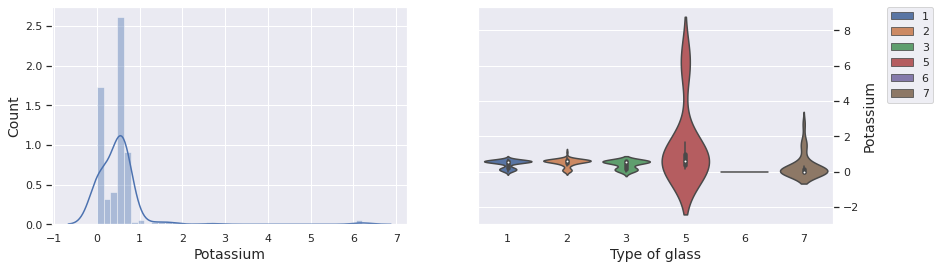

In [298]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['K'], ax = axes[0])
axes[0].set_xlabel('Potassium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'K', data = df, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Potassium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

# Calcium

/home/antony/anaconda3/envs/bd/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


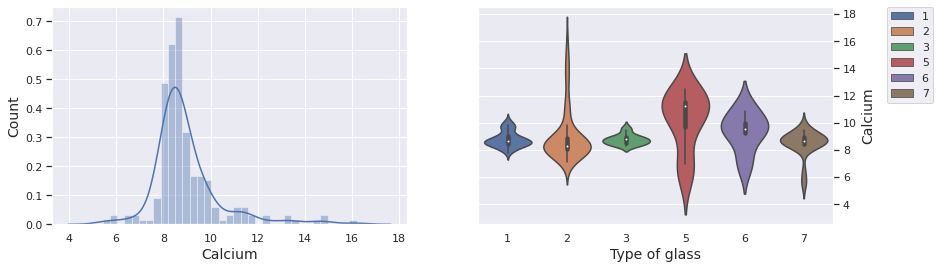

In [299]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['Ca'], ax = axes[0])
axes[0].set_xlabel('Calcium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Ca', data = df, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Calcium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

# Barium

/home/antony/anaconda3/envs/bd/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


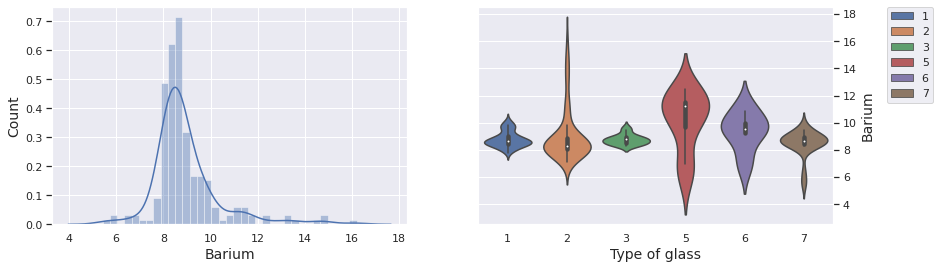

In [300]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['Ca'], ax = axes[0])
axes[0].set_xlabel('Barium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Ca', data = df, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Barium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

# Iron

/home/antony/anaconda3/envs/bd/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


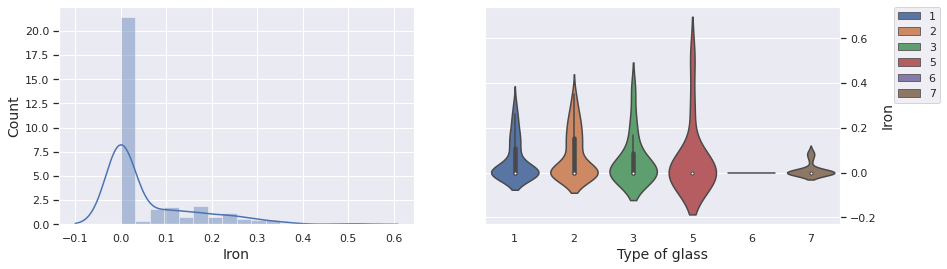

In [301]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['Fe'], ax = axes[0])
axes[0].set_xlabel('Iron', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Fe', data = df, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Iron', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

# Extract Labels to a different data frame.

In [302]:
x_training = df.drop('Type', axis = 1)
y_training = df['Type']
print(y_training.shape)

(214,)


# Plot the training set

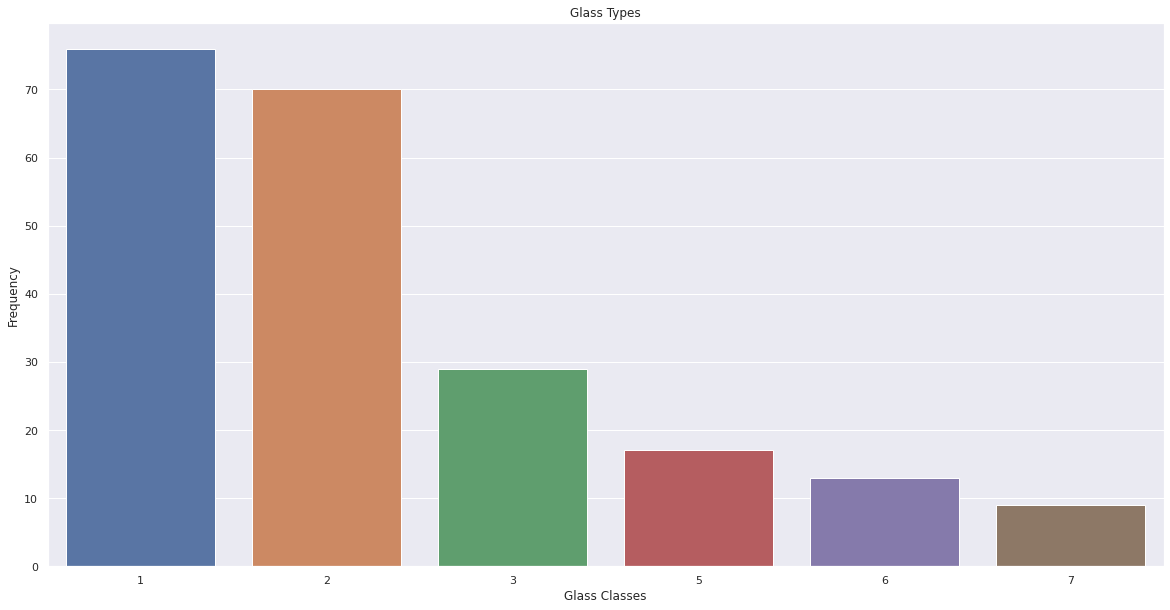

In [303]:
ybar= df['Type']
glass= ybar.unique()
values = ybar.value_counts()
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x=glass, y=values)
plt.title("Glass Types")
plt.xlabel("Glass Classes")
plt.ylabel("Frequency")
plt.show()

# explore data values

In [304]:
x_training.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


# convert data to use with keras for normalisation

In [305]:
x = df.values
x_norm = normalize(x)
print (x[0])
print (x_norm[0])


[1.52101e+00 1.36400e+01 4.49000e+00 1.10000e+00 7.17800e+01 6.00000e-02
 8.75000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
[2.06227172e-02 1.84938864e-01 6.08779693e-02 1.49144245e-02
 9.73233994e-01 8.13514066e-04 1.18637468e-01 0.00000000e+00
 0.00000000e+00 1.35585678e-02]


# convert label 

In [306]:
y_training = to_categorical(y_training)
y_training.shape

(214, 8)

# Split the data for training

In [307]:
x_norm, x_val, y_training, y_val = train_test_split(x_norm, y_training, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5)

# visualise the data in a heatmap

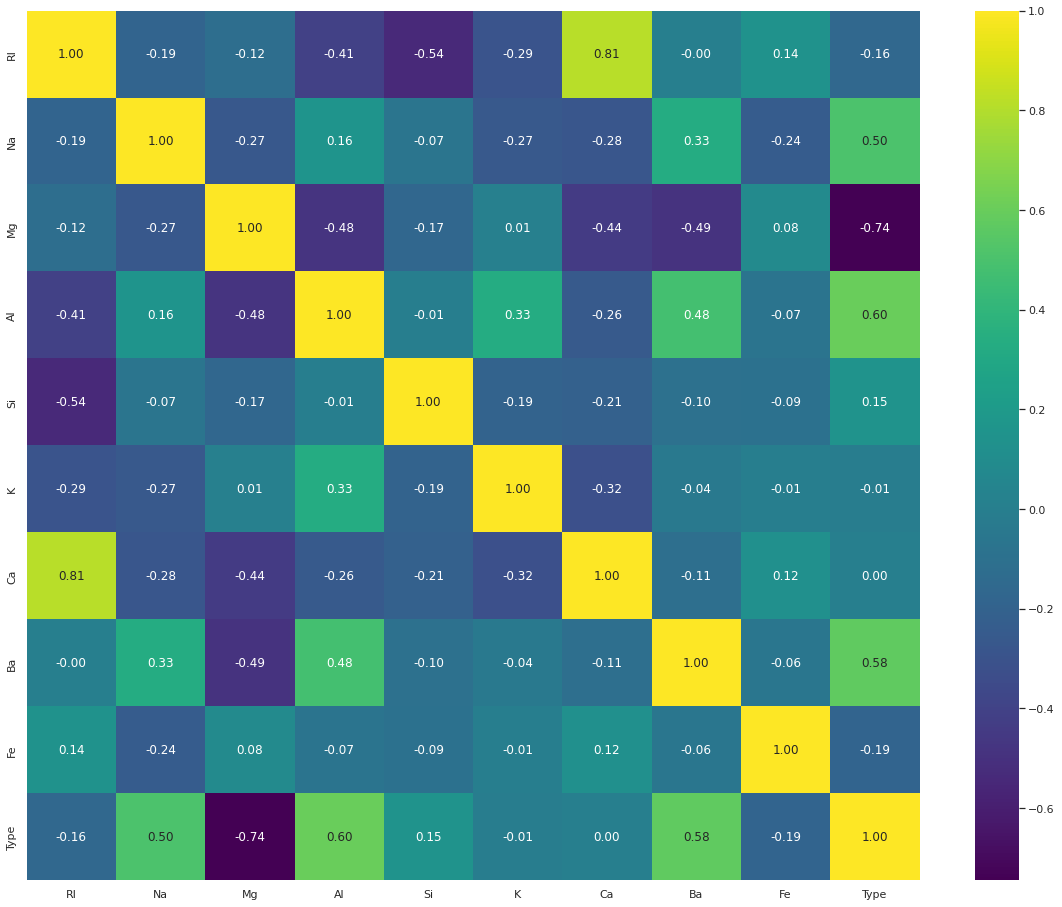

In [308]:
corr =df.corr()

fig, ax =plt.subplots(figsize=(20,16))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='viridis', annot=True, fmt='.2f')
#Apply xticks

#show plot
plt.show()

# Create the model

In [309]:
with tf.device('/cpu:0'):
    model = tf.keras.models.Sequential([

    tf.keras.layers.Dense(256, input_shape=(10,), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), kernel_initializer='lecun_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(256, activation='selu', kernel_regularizer=tf.keras.regularizers.l2(0.001), kernel_initializer='lecun_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(512, activation='selu', kernel_regularizer=tf.keras.regularizers.l2(0.001), kernel_initializer='lecun_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
            
    tf.keras.layers.Dense(8, activation='softmax')
])

with tf.device('/cpu:0'):

    model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['acc'])

    model
    

# view the model

In [310]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               2816      
_________________________________________________________________
batch_normalization_15 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)              

# train the model

In [311]:

with tf.device('/GPU:0'):
    
    history = model.fit(x_norm, y_training,
                    epochs=500,
                    validation_data=(x_val, y_val),
                    verbose='auto',
                    batch_size=256,
                    workers=8,
                    use_multiprocessing=True,
                                       
                   )



Train on 171 samples, validate on 21 samples
Epoch 1/500


/home/antony/anaconda3/envs/bd/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78/500
Epoch 7

# Evaluate the model

# Display Model Accuracy

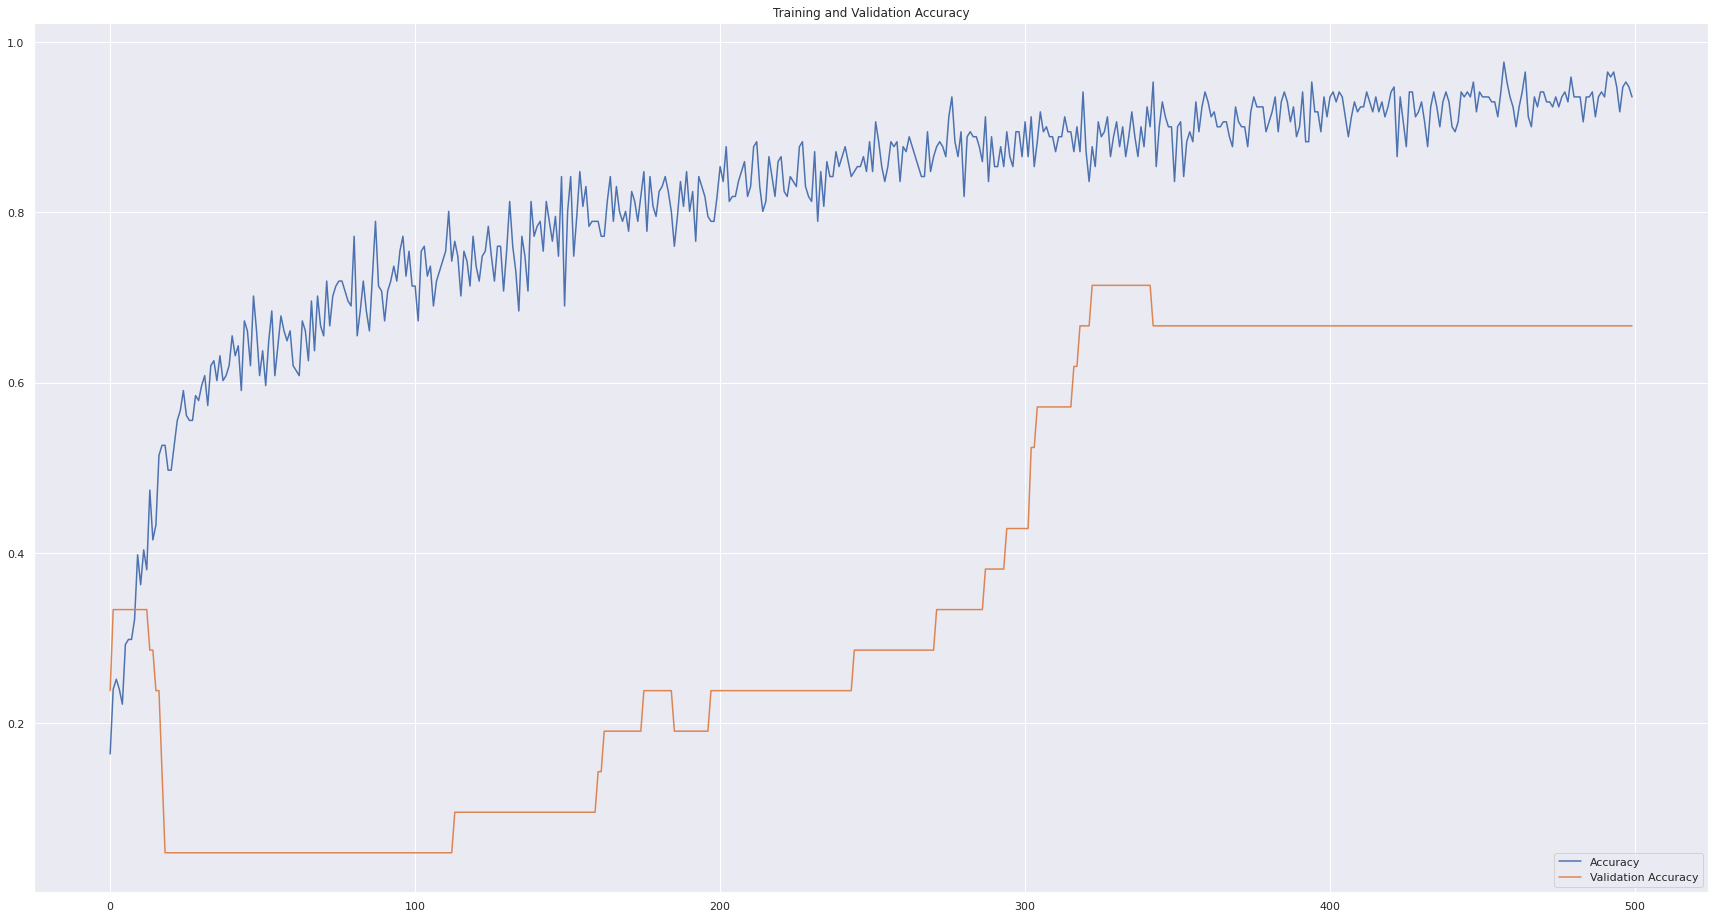

In [312]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(30,16)})
sns.lineplot(x=history.epoch, y=history.history['acc'], label='Accuracy')
sns.lineplot(x=history.epoch, y=history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')

# Display Model Accuracy

In [313]:

accuracy = history.history['acc'][-1]*100
val_accuracy = history.history['val_acc'][-1]*100
print ("Accuracy:", round(accuracy,3), "%")
print ("Validation Accuracy:", round(val_accuracy,3), "%")



Accuracy: 93.567 %
Validation Accuracy: 66.667 %


# Display model loss

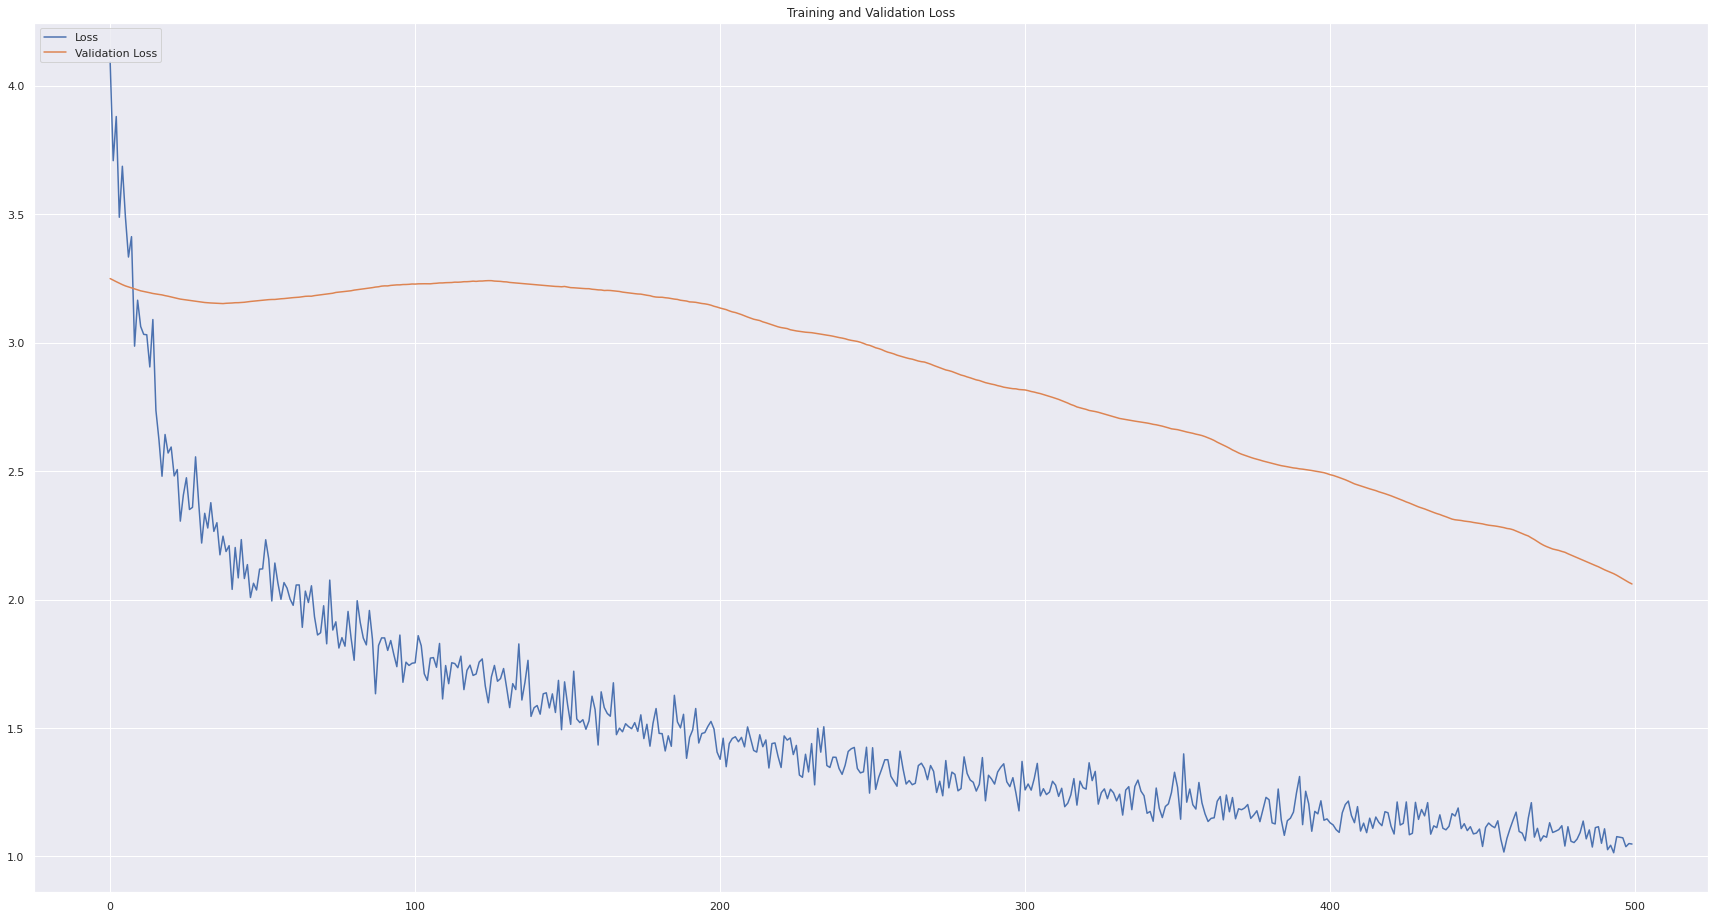

In [314]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(30,16)})
sns.lineplot(x=history.epoch, y=history.history['loss'], label='Loss')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper left')



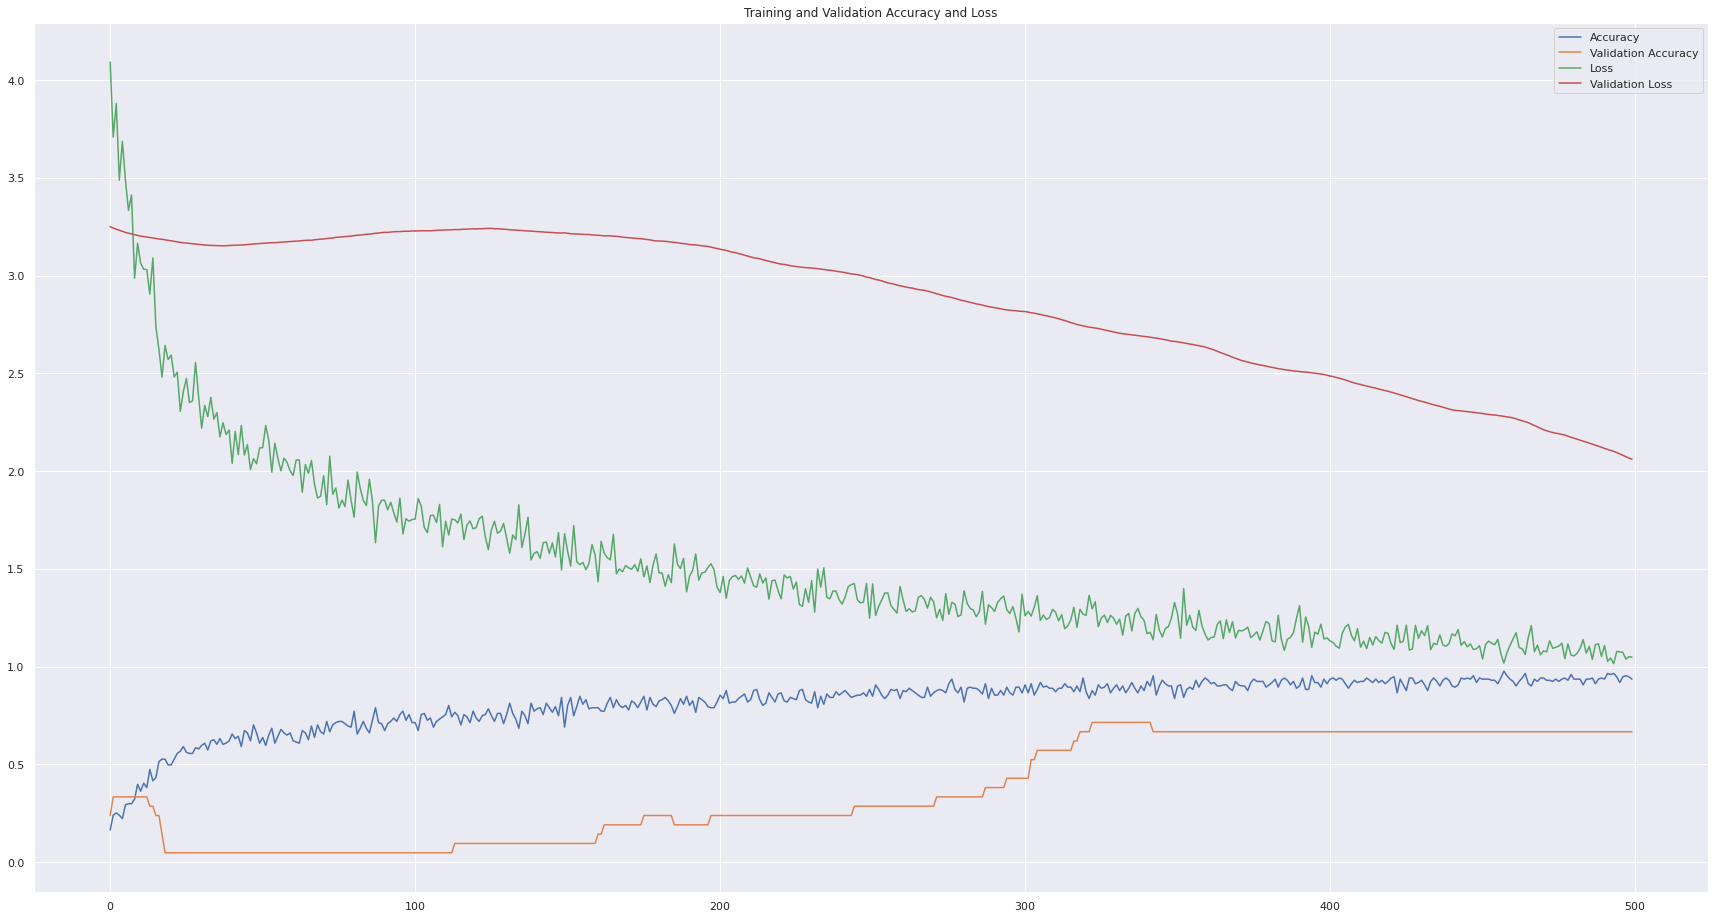

In [315]:
#add a lineplot from seaborn
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(30,16)})
sns.lineplot(x=history.epoch, y=history.history['acc'], label='Accuracy')
sns.lineplot(x=history.epoch, y=history.history['val_acc'], label='Validation Accuracy')
sns.lineplot(x=history.epoch, y=history.history['loss'], label='Loss')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Accuracy and Loss')
plt.legend(loc='upper right')



# Evaluate on the test data

In [316]:
model.evaluate(x_test, y_test)

[1.9867620468139648, 0.72727275]

# Display the best model accuracy

In [317]:
best_model_accuracy = history.history['acc'][np.argmin(history.history['loss'])]*100
print ("Best Model Accuracy:", round(best_model_accuracy, 3), "%")

Best Model Accuracy: 96.491 %


# confusion matrix

/home/antony/anaconda3/envs/bd/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


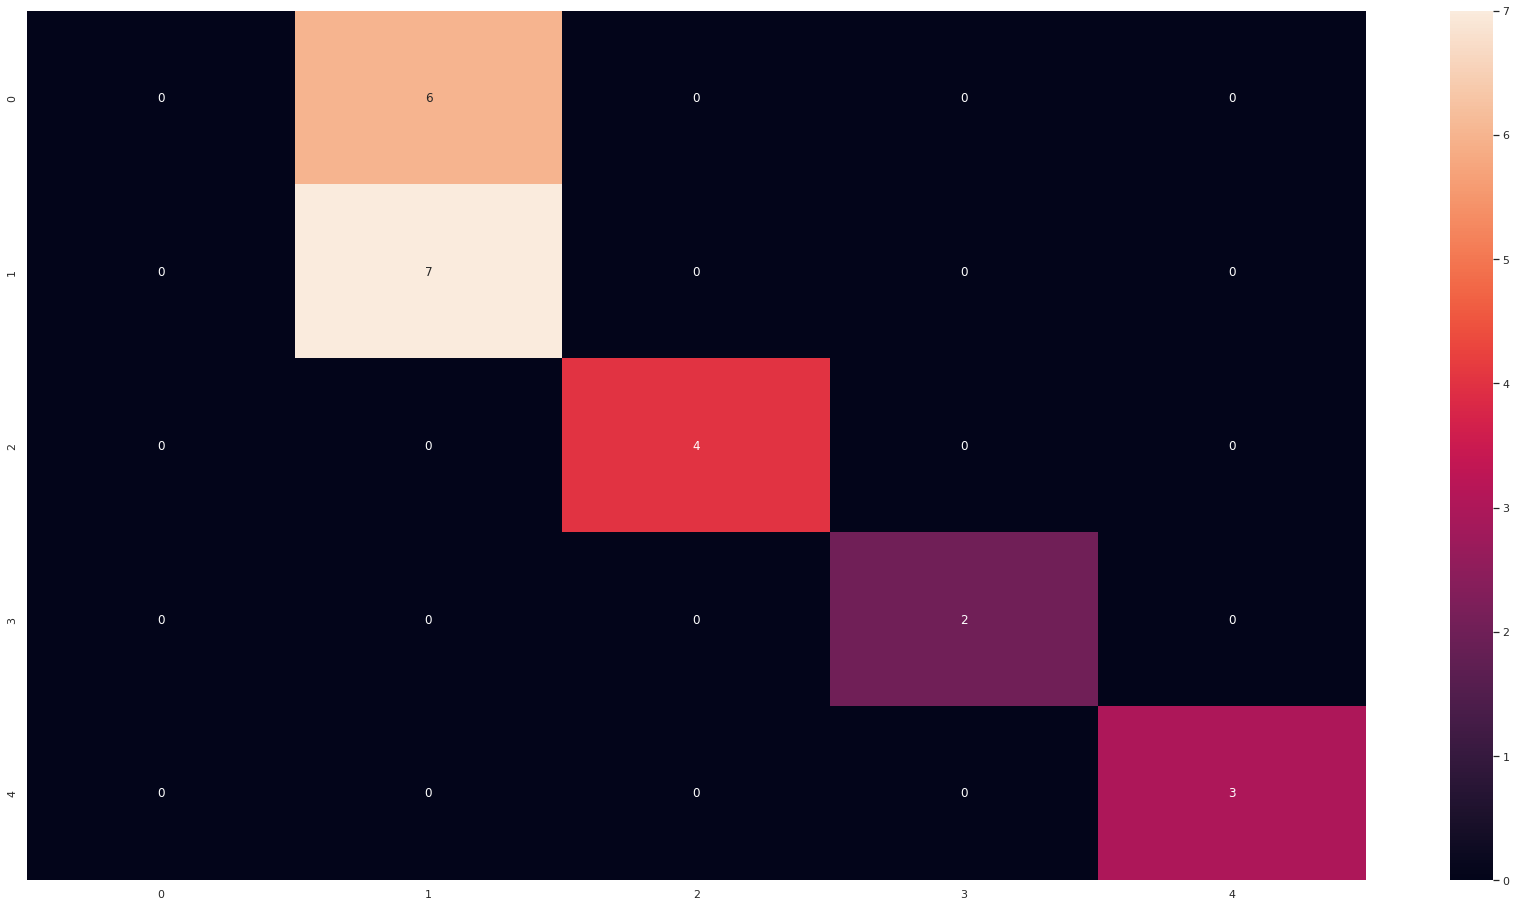

In [318]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

sns.heatmap(confusion_matrix(y_true, y_pred_classes),annot=True,fmt="d")
plt.show()